# ** PARTIDOS FIFA COPA MUNDIAL**

## Importamos los datos

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
partidos_fifa_copa_mundial_procesado = pd.read_csv('https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt', delimiter='\t')

partidos_fifa_copa_mundial_procesado

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0
...,...,...,...,...,...,...,...,...,...,...
895,2018,Rusia,Samara Arena,Samara (UTC+4),(60),2018-07-07,Suecia,Inglaterra,0,2
896,2018,Rusia,Saint Petersburg Stadium,St. Petersburg (UTC+3),(61),2018-07-10,Francia,Bélgica,1,0
897,2018,Rusia,Luzhniki Stadium,Moscow (UTC+3),(62),2018-07-11,Croacia,Inglaterra,2,1
898,2018,Rusia,Saint Petersburg Stadium,St. Petersburg (UTC+3),(63),2018-07-14,Bélgica,Inglaterra,2,0


In [146]:
partidos_fifa_copa_mundial_procesado = partidos_fifa_copa_mundial_procesado[(partidos_fifa_copa_mundial_procesado['equipo_1'].isin(['Brasil', 'Argentina'])) & (partidos_fifa_copa_mundial_procesado['equipo_2'].isin(['Brasil', 'Argentina']))]

partidos_fifa_copa_mundial_procesado

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
261,1974,Alemania occidental,Niedersachsenstadion,Hanover,(30),1974-06-30,Argentina,Brasil,1,2
300,1978,Argentina,Estadio Gigante de Arroyito,Rosario,(30),1978-06-18,Argentina,Brasil,0,0
351,1982,España,Estadio Sarriá,Barcelona,(43),1982-07-02,Argentina,Brasil,1,3
450,1990,Italia,Stadio Delle Alpi,Turin,(39),1990-06-24,Brasil,Argentina,0,1


## Visualizacion de los nombres de las columnas

In [147]:
partidos_fifa_copa_mundial_procesado.columns.values

array(['anio', 'anfitrion', 'estadio', 'ciudad', 'partido_orden', 'fecha',
       'equipo_1', 'equipo_2', 'equipo_1_final', 'equipo_2_final'],
      dtype=object)

In [148]:
lista=[]
for i in partidos_fifa_copa_mundial_procesado.columns.values:
    if i.startswith('equipo'):
        lista.append(i)
        
lista

['equipo_1', 'equipo_2', 'equipo_1_final', 'equipo_2_final']

In [149]:
partidos_fifa= partidos_fifa_copa_mundial_procesado[lista]
partidos_fifa

,equipo_1,equipo_2,equipo_1_final,equipo_2_final
261,Argentina,Brasil,1,2
300,Argentina,Brasil,0,0
351,Argentina,Brasil,1,3
450,Brasil,Argentina,0,1


In [150]:
#partidos_fifa = partidos_fifa_copa_mundial_procesado.set_index('equipo_anfitrion')


In [151]:
partidos_fifa

,equipo_1,equipo_2,equipo_1_final,equipo_2_final
261,Argentina,Brasil,1,2
300,Argentina,Brasil,0,0
351,Argentina,Brasil,1,3
450,Brasil,Argentina,0,1


## Realizo una suma para conocer el total de partidos finales de los paises

In [152]:
partidos_fifa['total_equipo_1'] = partidos_fifa['equipo_1_final'].groupby(partidos_fifa['equipo_1']).transform('sum')
partidos_fifa['total_equipo_2'] = partidos_fifa['equipo_2_final'].groupby(partidos_fifa['equipo_2']).transform('sum')


In [153]:
partidos_fifa.reset_index(inplace=True)

In [154]:
partidos_fifa = partidos_fifa.drop(partidos_fifa.columns[0], axis=1)
partidos_fifa

,equipo_1,equipo_2,equipo_1_final,equipo_2_final,total_equipo_1,total_equipo_2
0,Argentina,Brasil,1,2,2,5
1,Argentina,Brasil,0,0,2,5
2,Argentina,Brasil,1,3,2,5
3,Brasil,Argentina,0,1,0,1


## Graficas

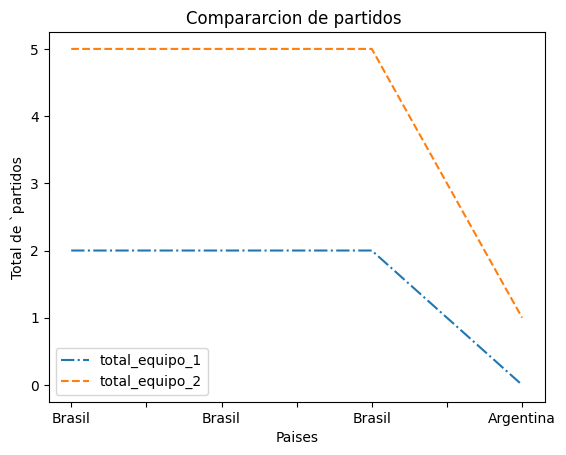

In [155]:
import matplotlib.pyplot as plt
fig= plt.figure()
eje= fig.add_subplot(1,1,1)
partidos_fifa.plot(x= 'equipo_1', y='total_equipo_1' , ax= eje, linestyle= '-.')
partidos_fifa.plot(x= 'equipo_2', y='total_equipo_2', ax= eje, linestyle= '--')
plt.xlabel('Paises')
plt.ylabel('Total de `partidos')
plt.title('Compararcion de partidos ')
plt.legend(loc ='best')

## Graficas covertidas en png

In [156]:
plt.savefig('Grafico_1.png')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Año')

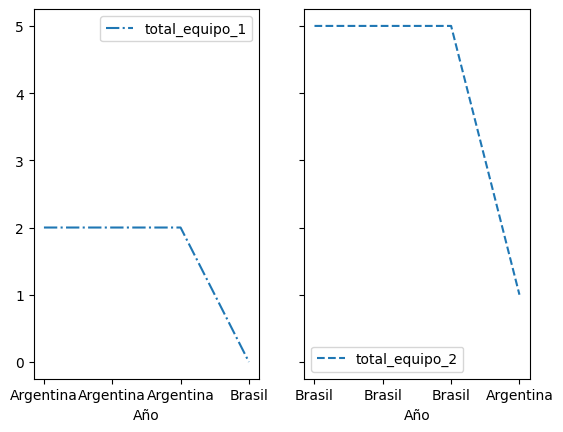

In [157]:
fig = plt.figure()
eje = fig.add_subplot(1, 2, 1)
partidos_fifa.plot(x='equipo_1', y='total_equipo_1', ax=eje, linestyle='-.')
eje.set_xlabel('Año')

eje2 = fig.add_subplot(1, 2, 2, sharey=eje)
partidos_fifa.plot(x='equipo_2', y='total_equipo_2', ax=eje2, linestyle='--')
eje2.set_xlabel('Año')

In [158]:
plt.savefig('Grafico_2.png')

<Figure size 640x480 with 0 Axes>